# mingrad linear model on diabetes dataset

In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from mingrad.engine import Value
from mingrad.nn import Linear, Sequential, MAE, Adam
import matplotlib.pyplot as plt

### data

In [3]:
diabetes = load_diabetes()
x, y = diabetes.data, diabetes.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, y_train = Value(x_train), Value(y_train.reshape(-1, 1))

### model

In [4]:
model = Sequential(
    Linear(10, 1)
    )
optimizer = Adam(model.parameters(), lr=0.9)
mae = MAE()

### training loop

In [5]:
losses = []
for epoch in range(400):
    out = model(x_train)
    loss = mae(out, y_train)
    loss.backward()
    optimizer.step()
    #print(f"Epoch {epoch+1}, Loss: {loss.data}")
    losses.append(loss.data)

### loss curve

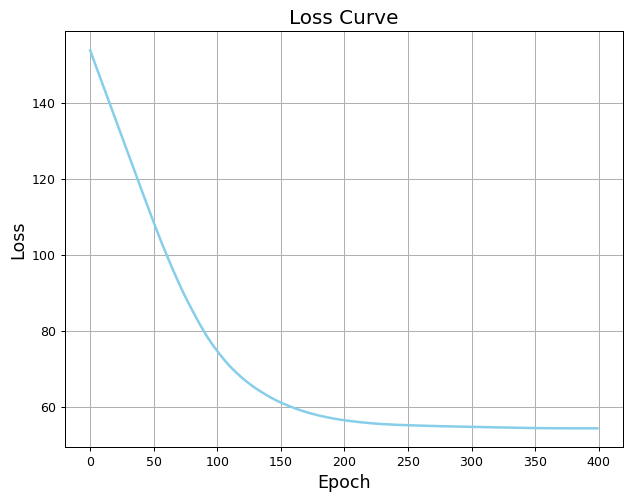

In [6]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=90)

ax.plot(losses, color='skyblue', linewidth=2)
ax.set_title('Loss Curve', fontsize=16)
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax.grid(True)

plt.show()

### predict

In [7]:
x_test = Value(x_test)
y_pred = model(x_test)

### the correlation between true values and predicted values

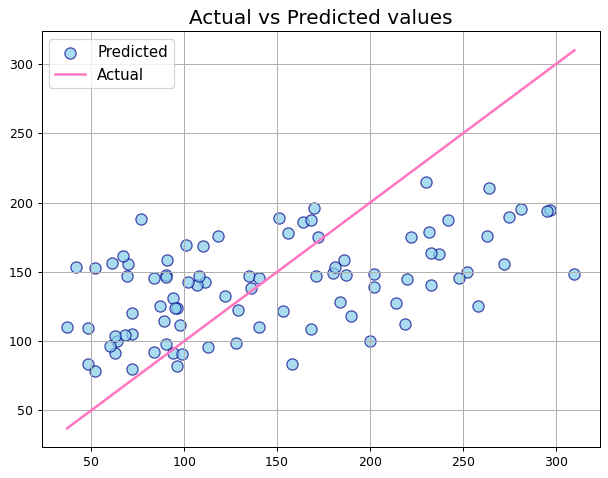

In [8]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=90)
ax.scatter(y_test, y_pred.data, color='skyblue', edgecolors='darkblue', s=80, alpha=0.7, label='Predicted')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '#ff75c1', lw=2, label='Actual')
ax.set_title('Actual vs Predicted values', fontsize=16)
ax.grid(True)
ax.legend(fontsize=12)
plt.show()

### graph

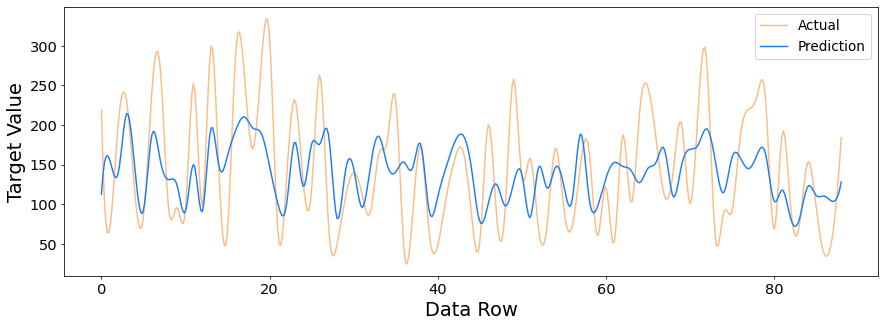

In [9]:
from scipy.interpolate import make_interp_spline

y_test = y_test.flatten()
y_pred = y_pred.data.flatten()

x_values = np.arange(len(y_test))

spline_actual = make_interp_spline(x_values, y_test)
spline_predicted = make_interp_spline(x_values, y_pred)

x_smooth = np.linspace(x_values.min(), x_values.max(), 500)

y_smooth_actual = spline_actual(x_smooth)
y_smooth_predicted = spline_predicted(x_smooth)

plt.figure(figsize=(15, 5), dpi=70)
plt.plot(x_smooth, y_smooth_actual, label='Actual', color="#fcbc83")
plt.plot(x_smooth, y_smooth_predicted, label='Prediction', color="#1e7dfa")
plt.tick_params(labelsize=15)
plt.ylabel('Target Value', fontsize=20)
plt.xlabel('Data Row', fontsize=20)
plt.legend(fontsize=14)
plt.show()